In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%time
import os
import gc
import random
import pandas as pd
import polars as pl
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from math import log, sqrt
from scipy.stats import (ttest_1samp, pearsonr, spearmanr, f_oneway, shapiro, kstest, norm, chi2)

from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

CPU times: user 4.61 s, sys: 610 ms, total: 5.22 s
Wall time: 6.4 s


In [ ]:
!pip install scikeras
!pip install tensorflow==2.9
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 29.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.12.23
    Uninstalling flatbuffers-24.12.23:
      Successfully uninstalled flatbuffers-24.12.23
  Attempting uninstall: tensorboard-data-se

In [ ]:
import keras; print(keras.__version__)
import tensorflow as tf
print(tf.__version__)

2.9.0
2.9.0


In [ ]:
# load data
train_9= (
    pl.read_parquet('/content/drive/MyDrive/kaggle/part9_train.parquet')
)
train_9= train_9.to_pandas()
train_9.head(5)
print(train_9.shape)

In [ ]:
data=pd.DataFrame(train_9)
data.head()

,time_id,symbol_id,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_6
0,0,0,1.153571,1.563784,0.697396,0.756759,2.580965,0.171311,1.126353,0.536153,...,-0.959100,1.284456,-0.275493,NaN,NaN,4.188457,3.666236,0.848177,0.999516,3.071231
1,0,1,0.553354,1.730064,0.990195,0.611490,2.023031,0.319015,1.183371,0.562853,...,-0.960126,0.306505,-0.522036,NaN,NaN,1.138142,1.579439,0.179564,0.160609,1.979042
2,0,2,1.532503,2.095852,0.919688,0.583715,2.330047,0.337096,1.262236,0.496050,...,-1.219395,0.359229,-0.636138,NaN,NaN,0.445388,0.300118,-0.043114,-0.065761,-0.506260
3,0,3,0.647099,1.687460,0.569406,1.061679,2.444131,0.150487,0.896543,0.705652,...,-1.398495,0.231285,-0.595247,NaN,NaN,6.995454,7.133929,0.352965,0.526284,-2.590589
4,0,4,1.096778,1.551411,0.632113,0.368218,2.181873,0.214604,1.194230,0.261056,...,-1.123492,0.120676,-0.610595,NaN,NaN,0.493589,0.560821,-1.332615,-0.965623,-1.579623


In [ ]:
# exclude weight. responder0-5,7-8
data=train_9.drop(['date_id','responder_0','responder_1','responder_2','responder_3','responder_4','responder_5','responder_7','responder_8','weight'],axis=1,inplace=True)



KeyError: "['date_id', 'responder_0', 'responder_1', 'responder_2', 'responder_3', 'responder_4', 'responder_5', 'responder_7', 'responder_8', 'weight'] not found in axis"

In [ ]:

data.head()

,time_id,symbol_id,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_6
0,0,0,1.153571,1.563784,0.697396,0.756759,2.580965,0.171311,1.126353,0.536153,...,-0.959100,1.284456,-0.275493,NaN,NaN,4.188457,3.666236,0.848177,0.999516,3.071231
1,0,1,0.553354,1.730064,0.990195,0.611490,2.023031,0.319015,1.183371,0.562853,...,-0.960126,0.306505,-0.522036,NaN,NaN,1.138142,1.579439,0.179564,0.160609,1.979042
2,0,2,1.532503,2.095852,0.919688,0.583715,2.330047,0.337096,1.262236,0.496050,...,-1.219395,0.359229,-0.636138,NaN,NaN,0.445388,0.300118,-0.043114,-0.065761,-0.506260
3,0,3,0.647099,1.687460,0.569406,1.061679,2.444131,0.150487,0.896543,0.705652,...,-1.398495,0.231285,-0.595247,NaN,NaN,6.995454,7.133929,0.352965,0.526284,-2.590589
4,0,4,1.096778,1.551411,0.632113,0.368218,2.181873,0.214604,1.194230,0.261056,...,-1.123492,0.120676,-0.610595,NaN,NaN,0.493589,0.560821,-1.332615,-0.965623,-1.579623


In [ ]:
# fill na
# cols=[f'feature_0{i}' if i<10 else f'feature_{i}' for i in range(79)]
data=data.fillna(2)
data.shape
data.head()

,time_id,symbol_id,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_6
0,0,0,1.153571,1.563784,0.697396,0.756759,2.580965,0.171311,1.126353,0.536153,...,-0.959100,1.284456,-0.275493,2.0,2.0,4.188457,3.666236,0.848177,0.999516,3.071231
1,0,1,0.553354,1.730064,0.990195,0.611490,2.023031,0.319015,1.183371,0.562853,...,-0.960126,0.306505,-0.522036,2.0,2.0,1.138142,1.579439,0.179564,0.160609,1.979042
2,0,2,1.532503,2.095852,0.919688,0.583715,2.330047,0.337096,1.262236,0.496050,...,-1.219395,0.359229,-0.636138,2.0,2.0,0.445388,0.300118,-0.043114,-0.065761,-0.506260
3,0,3,0.647099,1.687460,0.569406,1.061679,2.444131,0.150487,0.896543,0.705652,...,-1.398495,0.231285,-0.595247,2.0,2.0,6.995454,7.133929,0.352965,0.526284,-2.590589
4,0,4,1.096778,1.551411,0.632113,0.368218,2.181873,0.214604,1.194230,0.261056,...,-1.123492,0.120676,-0.610595,2.0,2.0,0.493589,0.560821,-1.332615,-0.965623,-1.579623


In [ ]:
# slipt to taining and testing set
df_for_training=data[3950000:4000000]
df_for_testing=data[4000000:4005000]
print(df_for_training.shape,df_for_testing.shape)

(50000, 82) (5000, 82)


In [ ]:
def create_sequences(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i])
            dataY.append(dataset[i])
    return np.array(dataX),np.array(dataY)

In [ ]:
df_for_training = df_for_training.to_numpy()
df_for_testing = df_for_testing.to_numpy()
n_past=60
X_train, y_train = create_sequences(df_for_training, n_past)
X_test, y_test = create_sequences(df_for_testing, n_past)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(49940, 60, 82) (49940, 82) (4940, 60, 82) (4940, 82)


In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(49940, 60, 82) (49940, 82) (4940, 60, 82) (4940, 82)


In [ ]:
# X_train=X_train.drop(['responder_6'],axis=1,inplace=True)
# X_test=X_test('responder_6')
# y_train =y_train .drop(['responder_6'],axis=1,inplace=True)
# y_test= y_test('responder_6')

X_train = X_train[:,:,:81] # Select all rows, all past values, and all columns except the last one (responder_6)
X_test = X_test[:,:,:81]
y_train = y_train[:,81] # Select all rows and all columns except the last one (responder_6)
y_test = y_test[:,81]
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
# Reshape input for LSTM (samples, timesteps, features)


(49940, 60, 81) (49940,) (4940, 60, 81) (4940,)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 81))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 81))

In [ ]:
from pickle import TRUE
from keras.regularizers import l2
def build_model():
    grid_model = Sequential()
    # grid_model.add(LSTM(50,activation='relu', return_sequences=True,input_shape=(168,21)))
    grid_model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(60,81)))
    # grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.5))
    grid_model.add(Dense(units=1))
    grid_model.compile(loss = 'mse',optimizer='adam')
    return grid_model

grid_model = KerasRegressor(build_fn=build_model)

<ipython-input-36-b704ddf33c79>:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model)


In [ ]:
history = grid_model.fit(X_train,y_train,epochs=50,batch_size=8,verbose=1,validation_split=0.1)

Epoch 1/50
5619/5619 [==============================] - 193s 34ms/step - loss: 389391.2500 - val_loss: 971.0669
Epoch 2/50
5619/5619 [==============================] - 190s 34ms/step - loss: 303.6814 - val_loss: 3.5609
Epoch 3/50
5619/5619 [==============================] - 189s 34ms/step - loss: 5.7806 - val_loss: 3.3065
Epoch 4/50
5619/5619 [==============================] - 190s 34ms/step - loss: 6.1577 - val_loss: 361.7016
Epoch 5/50
5619/5619 [==============================] - 191s 34ms/step - loss: 20.9863 - val_loss: 1.1843
Epoch 6/50
5619/5619 [==============================] - 188s 33ms/step - loss: 239.0132 - val_loss: 1.5035
Epoch 7/50
5619/5619 [==============================] - 191s 34ms/step - loss: 1.6810 - val_loss: 0.9991
Epoch 8/50
5619/5619 [==============================] - 188s 34ms/step - loss: 1.0915 - val_loss: 1.1189
Epoch 9/50
5619/5619 [==============================] - 190s 34ms/step - loss: 1.0371 - val_loss: 1.0384
Epoch 10/50
5619/5619 [==================

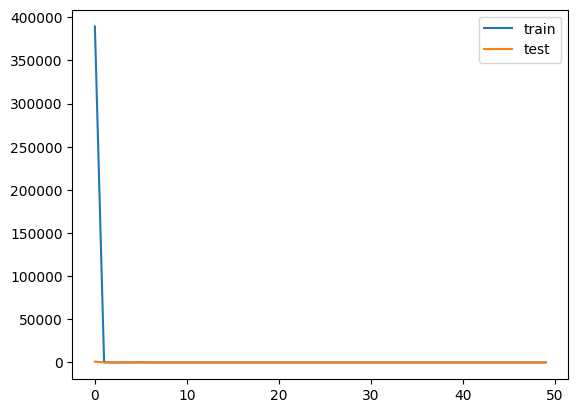

In [ ]:
# plot loss
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
prediction=grid_model.predict(X_test)

155/155 [==============================] - 2s 12ms/step


In [ ]:
prediction.shape

(4940, 60)

In [ ]:
pred=pd.DataFrame(prediction)
pred=pred.drop(columns=list(range(1, 60)))

In [ ]:
pred.to_numpy
pred.shape
# y_test.shape

(4940, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
# mape = (np.abs((pred) / y_test).mean()) * 100

print(f"MSE: {mse:.7f}")
print(f"MAE: {mae:.7f}")
print(f"R²: {r2:.7f}")
# print(f"MAPE: {mape:.7f}%")

MSE: 1.4796741
MAE: 0.8572397
R²: -0.0024055


In [ ]:
weights=pd.DataFrame(train_9)[4000000:4005000]
weights.head()

,time_id,symbol_id,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_6
4000000,948,36,-0.625425,0.064982,-1.055882,-1.102443,0.747471,0.230211,-2.005207,-1.593595,...,-0.451845,-0.365481,-0.458741,0.287189,0.287115,-0.132130,-0.286767,0.266430,0.157104,0.159987
4000001,948,37,-0.849148,-0.640464,-0.966832,-1.062401,0.736048,0.224339,-3.926876,-1.453356,...,1.012284,1.089473,0.482453,-0.440091,-0.440912,1.315276,1.355506,0.138522,0.062605,-0.939036
4000002,948,38,-0.386984,-0.399881,-0.683697,-0.580723,0.837856,0.294680,-2.607338,-1.396474,...,0.054826,-0.299063,-0.037095,-0.055960,-0.125962,-0.150408,-0.224727,0.053036,-0.020888,0.700482
4000003,949,0,-0.861510,-0.533907,-0.555045,-1.119408,0.438079,0.326208,-0.280414,-0.821483,...,1.122206,-0.050730,1.195799,-0.296448,-0.346416,-0.093083,-0.181995,-0.091864,-0.095375,1.696346
4000004,949,1,-0.930252,-0.348164,-0.756956,-1.140390,0.734044,0.456726,-0.198177,-0.953265,...,1.182186,0.248207,0.755792,-0.652454,-1.237373,-0.485544,-0.889862,-0.634014,-0.824257,-0.023414


In [ ]:
weights.shape

(5000, 82)

In [ ]:
def custom_metric(y_true,y_pred,weight):
    weighted_r2=1-(np.sum(weight*(y_true-y_pred)**2)/np.sum(weight*y_true**2))
    return weighted_r2


In [ ]:
print(f"test weighted_r2:{custom_metric(y_test,pred,weight=weights)}")

ValueError: Unable to coerce to Series, length must be 1: given 4940